### Estudio de la contaminación en Madrid: impacto de la cuarentena ###


El dataset de contaminación de madrid contiene los datos de la concentración de diferentes contaminantes tomados a la hora en las distintas estaciones que se encuentran repartidas por la ciudad.

En él podemos encontrar así mismo una validación de los propios datos en una columna no numérica, ya que no todas las estaciones de medida siguen vigentes.

El 17 de Marzo nos sorprendía a todos la noticia de la claridad de las aguas de Venecia, cuando los italianos llevaban mes y medio de confinamiento. En España llevábamos tan solo un par de días y me saltó la curiosidad del impacto que la reducción drástica del uso de vehículos podría tener en la ciudad de Madrid.

La peligrosidad de los niveles de contaminación dependen del tipo de contaminante por lo que no se puede definir un umbral común a todos. Lo que sí tienes en común es que la presencia de estos gases se relaciona con problemas respiratorios y cardíacos y con un aumento del riesgo de mortalidad.

Aunque se toman medidas de numeros elementos tóxicos, en este trabajo nos centraremos con algunos de los principales:

DIÓXIDO DE AZUFRE
MONÓXIDO DE CARBONO
MONÓXIDO DE NITRÓGENO
PARTÍCULAS <2.5 micrómetros
ÓXIDOS DE NITRÓGENO
OZONO



In [3]:
from libmadproject import *
%load_ext autoreload
%autoreload 2

In [30]:
import pathlib
pathlib.Path().absolute()

WindowsPath('c:/Users/34653/Documents/Proyectos/QuarantineContaminationMadrid')

In [31]:
import os
os.path.abspath(os.getcwd())

'c:\\Users\\34653\\Documents\\Proyectos\\QuarantineContaminationMadrid'

In [45]:
list_json = ['climamad.json',
              'barajas_2010_2015.json',
'barajas_2015_2020.json',
'primeros_2010_barajas.json',
'primeros_2010_retiro.json',
'retiro_2010_2015.json']
list_csv = ['data2010.csv','data2011.csv','data2012.csv','data2013.csv','data2014.csv','data2015.csv','data2016.csv','data2017.csv','data2018.csv','data2019.csv','datos202008.csv']

In [46]:
list_json = ['data/'+ i for i in list_json]
list_csv = ['data/'+ i for i in list_csv]

La temperatura influye en la aparición de algunos contaminantes, por ello se estudió el dataset del clima proporcionado por la AEMET.

In [4]:
clima = pd.read_json('data/climamad.json', dtype = True)
clima.head()

fecha  indicativo          nombre provincia  altitud  tmed prec  tmin  \
0  2015-07-01        3195  MADRID, RETIRO    MADRID      667  29,2  0,0  22,7   
1  2015-07-02        3195  MADRID, RETIRO    MADRID      667  27,6  0,0  22,2   
2  2015-07-03        3195  MADRID, RETIRO    MADRID      667  29,4  0,0  22,4   
3  2015-07-04        3195  MADRID, RETIRO    MADRID      667  30,0  0,0  23,2   
4  2015-07-05        3195  MADRID, RETIRO    MADRID      667  30,3  0,0  23,5   

  horatmin  tmax horatmax   dir velmedia racha horaracha presMax horaPresMax  \
0    06:10  35,6    15:50  27.0      2,2   8,6     19:10   939,9          08   
1    06:00  33,0    15:10  14.0      1,4  10,8     22:30   943,5          10   
2    05:10  36,5    15:10  22.0      2,8  11,1     14:00   943,9          24   
3    04:30  36,7    14:40  16.0      1,4   9,2     01:00   945,6          10   
4    05:50  37,1    13:30  20.0      1,9   8,3     13:00   943,3          10   

  presMin horaPresMin  
0   935,7          17  
1   939,5          00  
2   940,7          17  
3   940,3          20  
4   940,9          18

In [5]:
clima.to_excel('clima.xlsx')

ValueError: No engine for filetype: 'csv'

### Datos de la aemet: evolución de las temperaturas durante el año 2019

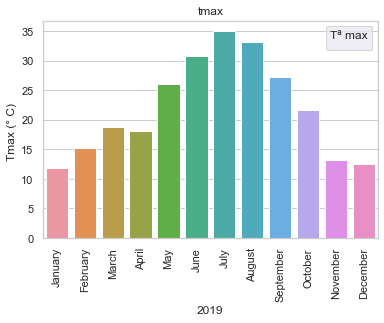

In [13]:
barplot_temp(['data/retiro_2015_2020.json','data/barajas_2015_2020.json'])

### Los niveles de contaminación han bajado en los últimos años siendo menores en verano

In [60]:
c = ['data2001.csv','data2002.csv','data2003.csv','data2004.csv','data2005.csv','data2006.csv','data2007.csv','data2008.csv','data2009.csv','data2010.csv','data2011.csv','data2012.csv','data2013.csv','data2014.csv','data2015.csv','data2016.csv','data2017.csv','data2018.csv','data2019.csv','datos202008.csv']
c = ['data/'+ i for i in c]

In [61]:
df_con=daily_airmad_varios_mu_m3(c)

In [64]:
df_c_s = df_con[['Value','FECHA','distrito_name','mag_name']]
df_c_s.to_excel('contaminacion.xlsx')

In [68]:
df_c_s[(df_c_s.mag_name == 'MonoxidodeCarbono') & (df_c_s.distrito_name =='Barajas')]

Empty DataFrame
Columns: [Value, FECHA, distrito_name, mag_name]
Index: []

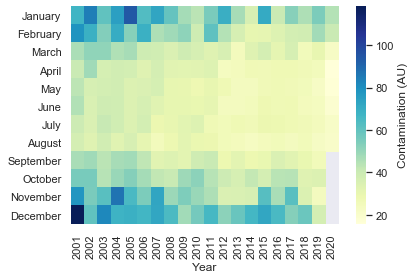

In [50]:
heat_map_years(c)

### Desde 2011 hasta 2019 los niveles totales medios de contaminación se habían mantenido constantes durante los meses de cuarentena. En 2020 se aprecia la bajada.

In [51]:
todos = ['data2001.csv','data2002.csv','data2003.csv','data2004.csv','data2005.csv','data2006.csv','data2007.csv','data2008.csv','data2009.csv','data2010.csv','data2011.csv','data2012.csv','data2013.csv','data2014.csv','data2015.csv','data2016.csv','data2017.csv','data2018.csv','data2019.csv','datos202008.csv']
todos = ['data/'+i for i in todos]
list_csv = ['data2010.csv','data2011.csv','data2012.csv','data2013.csv','data2014.csv','data2015.csv','data2016.csv','data2017.csv','data2018.csv','data2019.csv','datos202008.csv']
media_period_quarantine(todos, list_mag= [1,6,7,8,9,12,14])

### La bajada de contaminación en el año 2020 (en marrón) se debe a los meses de cuarentena

------------------------------------------------------------------
Mayor contaminación en el año 2017 es en el mes: 11
------------------------------------------------------------------
Menor contaminación:en el año 2017 es en el mes: 8
------------------------------------------------------------------
------------------------------------------------------------------
Mayor contaminación en el año 2018 es en el mes: 12
------------------------------------------------------------------
Menor contaminación:en el año 2018 es en el mes: 6
------------------------------------------------------------------
------------------------------------------------------------------
Mayor contaminación en el año 2019 es en el mes: 1
------------------------------------------------------------------
Menor contaminación:en el año 2019 es en el mes: 8
------------------------------------------------------------------
------------------------------------------------------------------
Mayor contaminación en

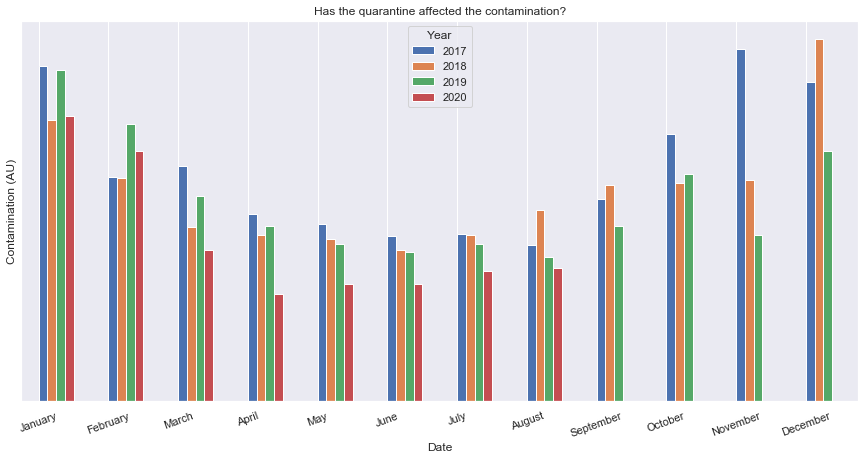

In [52]:
list_urls2 = ['data2017.csv','data2018.csv','data2019.csv','datos202008.csv']
list_urls2 = ['data/'+i for i in list_urls2]
bars_for_years_mu_m3(list_urls2,'Has the quarantine affected the contamination?')

### Evolución de los diferentes contaminantes

DIÓXIDO DE AZUFRE (125 microgramos por metro cúbico de aire al día)*

MONÓXIDO DE CARBONO (límite de CO en la atmósfera a 10 mg por metro cúbico)*

MONÓXIDO DE NITRÓGENO (200 microgramos por metro cúbico de aire)*

PARTÍCULAS <2.5 micrómetros (50 microgramos de estas partículas por metro cúbico de media diaria)*

ÓXIDOS DE NITRÓGENO (200 microgramos por metro cúbico de aire)*

OZONO (120 microgramos por metro cúbico de aire)*

*Valores elevados de contaminante

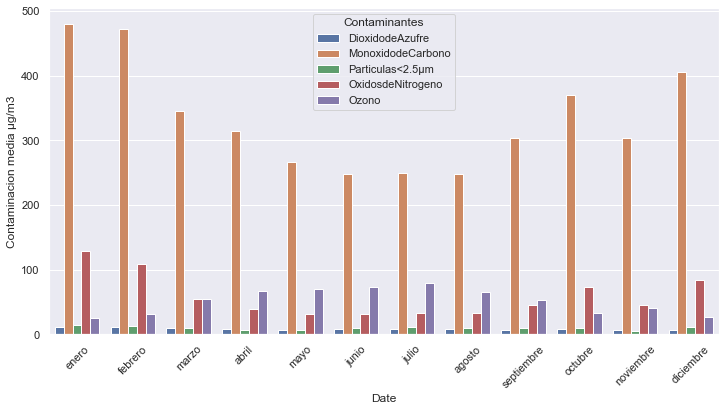

In [7]:
contaminantes_barplot('data/data2019.csv')

### No se encuentra correlación entre valores de contaminación y características climáticas

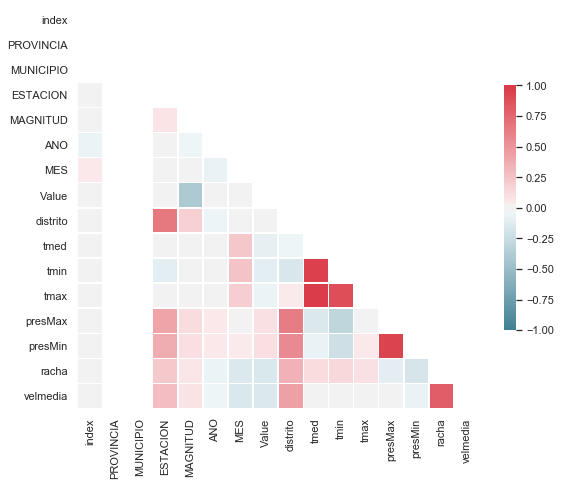

In [8]:
corrheat_triangular(list_csv, list_json)

### Los óxidos de nitrógeno se transforman en ozono con el aumento de temperatura en verano

C:\Users\34653\Documents\DataScience2_ap2020\DataScience\Proyecto_EDA\libmadproject.py:761: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Value[pos] = df.Value[pos]*1000


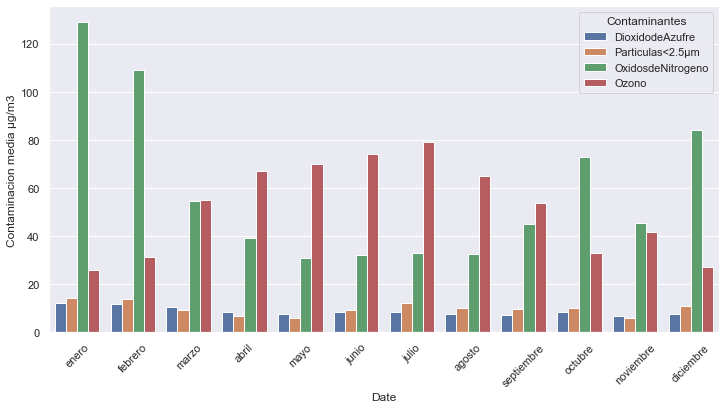

In [3]:
contaminantes_barplot('data/data2019.csv', co = False)

### Análisis por distritos: antes y después de la cuarentena

La contaminaión en Madrid ha caído hasta en un 60% en el barrio de Chamartín de Madrid como consecuencia el periodo de confinamiento.

In [57]:
mapa_por_distritos_periodos_varios(['data/data2019.csv','data/datos202008.csv'])

--------------------------------------
% Contaminación respecto al año anterior count    16.000000
mean     67.104789
std      15.654621
min      44.198995
25%      55.657303
50%      62.159384
75%      78.491133
max      96.341792
Name: porcentaje_antes_despues, dtype: float64
--------------------------------------
Distrito con minima caida es RETIRO 03
--------------------------------------
Distrito con maxima caida es CHAMARTÍN 01
--------------------------------------
rom 15th March to 30th April 2019


rom 15th March to 30th April 2020


In [56]:
list_m = ['data2018.csv','data2017.csv','data2019.csv','datos202008.csv']
list_m = ['data/'+i for i in list_m]
mapa_por_distritos_madridcentral(list_m)

Index(['level_0', 'index', 'PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD',
       'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA', 'Value', 'DIA_NUM', 'MES_0',
       'FECHA', 'FECHA_str', 'distrito', 'distrito_name', 'mag_name'],
      dtype='object')
DATOS MADRID CENTRAL PARA MONÓXIDO DE CARBONO Y ÓXIDOS DE NITRÓGENO
--------------------------------------
% Contaminación respecto al año anterior count     16.000000
mean     102.650054
std        8.580572
min       82.464407
25%       96.144564
50%      103.942631
75%      106.734269
max      119.808871
Name: porcentaje_antes_despues, dtype: float64
--------------------------------------
Distrito con minima caida es RETIRO 17
--------------------------------------
Distrito con maxima caida es VILLAVERDE 03
--------------------------------------
--------------------------------------
BEFORE MADRID CENTRAL
--------------------------------------


--------------------------------------
AFTER MADRID CENTRAL
--------------------------------------


La caída en distrito centro es inferior al 5%


### Teniendo en cuenta todos los contaminantes (no solo los más asociados a los vehículos) el distrito centro es uno de los más afectados

C:\Users\34653\Documents\DataScience2_ap2020\DataScience\Proyecto_EDA\libmadproject.py:761: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Value[pos] = df.Value[pos]*1000


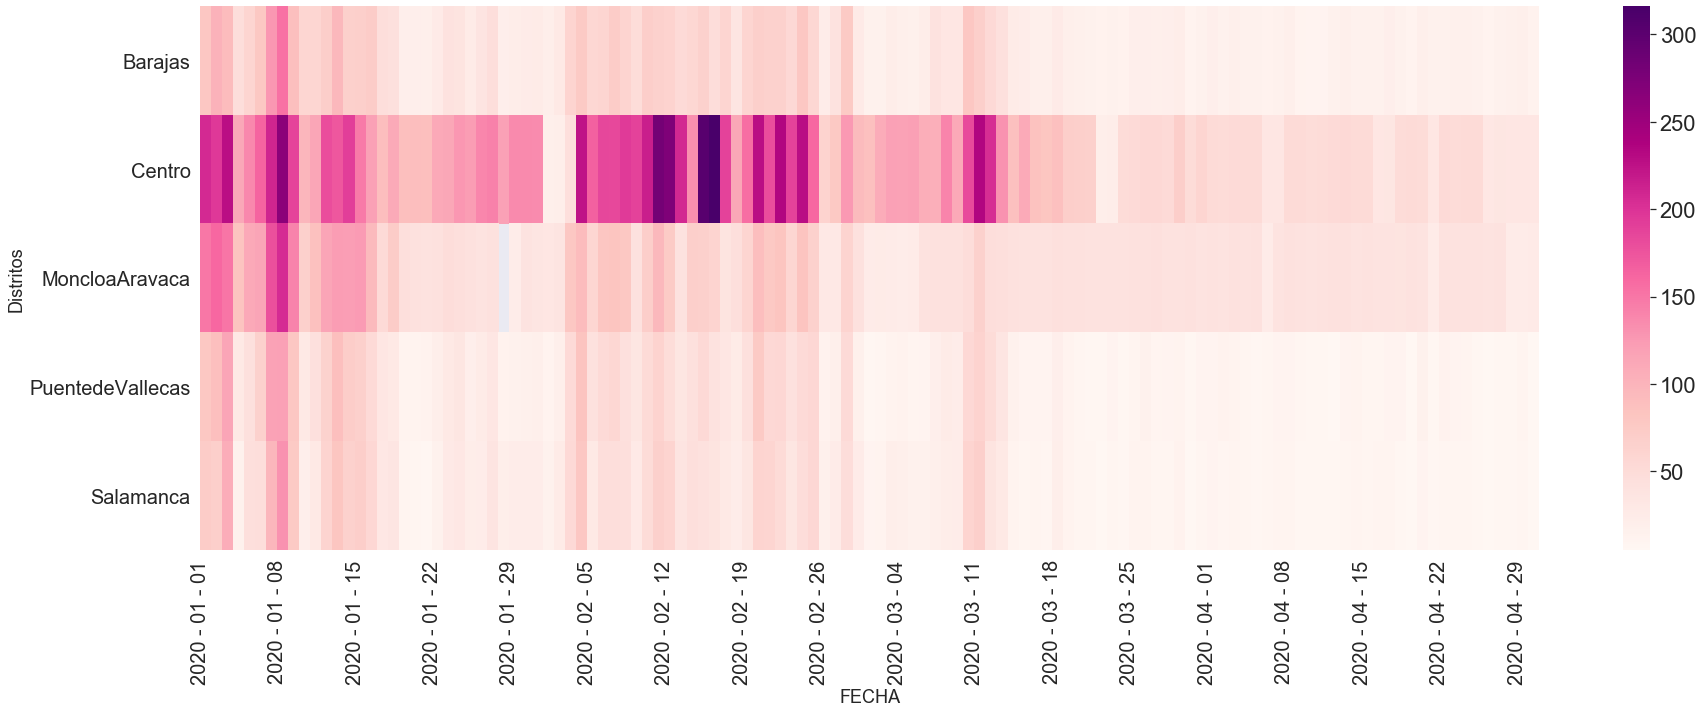

In [3]:
heatplot_distritos_general('datos202004.csv')